# Data Prep Insights

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import numpy as np

In [2]:
datadf = pd.read_csv('data.csv')
datadf.head()

,s_no,url,name,abp,lbp,aap,lap,include,polarity,level
0,1,https://www2.ed.gov/policy/rights/guid/ocr/sex...,federal,110,5743,310,312,1,neutral,central
1,2,https://www2.ed.gov/about/offices/list/ocr/doc...,federal,50,1098,200,209,1,neutral,central
2,3,https://www.justice.gov/crt/title-ix#1.%C2%A0%...,federal,200,2672,530,549,1,neutral,central
3,4,https://www.hhs.gov/civil-rights/for-individua...,federal,110,7479,630,448,1,neutral,central
4,5,https://www2.ed.gov/about/offices/list/ocr/sex...,federal,110,6050,290,351,1,neutral,central


In [3]:
temp = datadf.groupby(['polarity'], sort=True).count()['s_no']
temp

polarity
blue       54
neutral     7
red        54
Name: s_no, dtype: int64

<AxesSubplot:xlabel='polarity', ylabel='count'>

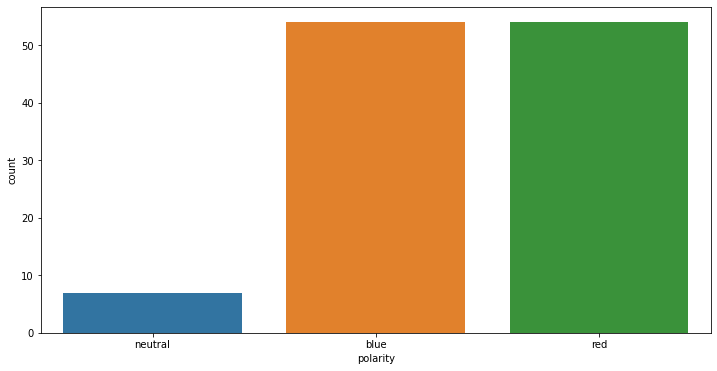

In [4]:
plt.figure(figsize=(12, 6))
sns.countplot(x='polarity', data=datadf)

In [5]:
temp = datadf.groupby(['level'], sort=True).count()['s_no']
temp

level
central        7
state         28
university    80
Name: s_no, dtype: int64

<AxesSubplot:xlabel='level', ylabel='count'>

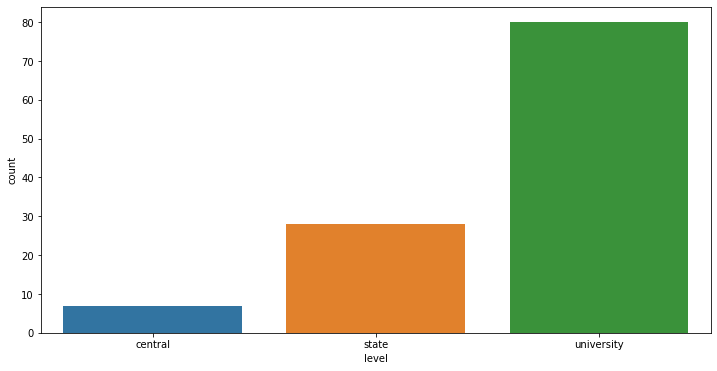

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='level', data=datadf)

In [7]:
from prep import TextAnalysis

In [8]:
ta = TextAnalysis()
ta.orchestrate()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EndUser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\EndUser\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\EndUser\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\EndUser\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


---------------------------------Initial Vector Loading Started-------------------------------------------
---------------------------------Initial Vector Loading Completed-------------------------------------------
Total time taken - 10.08597183227539
---------------------------------Preprocessing Started-------------------------------------------
---------------------------------Preprocessing Completed-------------------------------------------
Total time taken - 381.14961218833923


In [9]:
ta.transformer_models()

---------------------------------Transformer Preprocessing Started-------------------------------------------
---------------------------------Transformer Preprocessing Completed-------------------------------------------
Total time taken - 138.62116837501526


In [10]:
ta.initial_vector['calstate'].keys()

dict_keys(['id', 'name', 'raw_text', 'wp_text', 'text', 'counter_obj', 'most_common', 'least_common', 'stem', 'lemma', 'type', 'wptp', 'wpts', 'ftp', 'fts', 'swp', 'sws', 'lwp', 'lws', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'filtered_vader_neg', 'filtered_vader_neu', 'filtered_vader_pos', 'filtered_vader_compound', 'roberta_encoded_text', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'bert_encoded_text', 'pbb_left', 'pbb_center', 'pbb_right'])

In [11]:
df = pd.DataFrame.from_dict(ta.initial_vector.values())
df.head(5)

,id,name,raw_text,wp_text,text,counter_obj,most_common,least_common,stem,lemma,...,filtered_vader_pos,filtered_vader_compound,roberta_encoded_text,roberta_neg,roberta_neu,roberta_pos,bert_encoded_text,pbb_left,pbb_center,pbb_right
0,1,federal,title ix of the education amendments of 1972 ...,title ix of the education amendments of 1972 ...,title ix education amendments 1972 title ix pr...,"{'title': 964, 'ix': 619, 'education': 517, 'a...","{(education, 517), (program, 323), (recipient,...","{(redesign, 1), (advanced, 1), (appearing, 1),...",titl ix educ amend 1972 titl ix prohibit discr...,title ix education amendment 1972 title ix pro...,...,0.111,1.0000,"[input_ids, attention_mask]",0.341923,0.616065,0.042011,"[input_ids, token_type_ids, attention_mask]",0.192788,0.531336,0.275876
1,2,calstate,it is the policy of the state of california th...,it is the policy of the state of california th...,policy state california persons regardless gen...,"{'policy': 52, 'state': 125, 'california': 145...","{(california, 145), (department, 179), (regula...","{(faq, 1), (investigaciï¿½n, 1), (02oct2023, 1...",polici state california person regardless gend...,policy state california person regardless gend...,...,0.111,0.9999,"[input_ids, attention_mask]",0.114787,0.825152,0.060061,"[input_ids, token_type_ids, attention_mask]",0.226157,0.564006,0.209837
2,3,texasstate,vocational rehabilitation - title ix coordinat...,vocational rehabilitation title ix coordinato...,vocational rehabilitation title ix coordinator...,"{'vocational': 5, 'rehabilitation': 7, 'title'...","{(training, 61), (page, 33), (visit, 45), (com...","{(offer, 1), (victory, 1), (enactment, 1), (fa...",vocat rehabilit titl ix coordin texa workforc ...,vocational rehabilitation title ix coordinator...,...,0.116,0.9997,"[input_ids, attention_mask]",0.224121,0.671392,0.104487,"[input_ids, token_type_ids, attention_mask]",0.833179,0.097600,0.069221
3,4,nystate,"&lt;iframe src="" height=""0"" width=""0"" style=""d...",ltiframe src height0 width0 styledisplaynonevi...,ltiframe src height0 width0 styledisplaynonevi...,"{'ltiframe': 22, 'src': 22, 'height0': 22, 'wi...","{(law, 705), (student, 198), (school, 547), (n...","{(outten, 1), (pervasive”, 1), (negotiation, 1...",ltifram src height0 width0 styledisplaynonevis...,ltiframe src height0 width0 styledisplaynonevi...,...,0.164,1.0000,"[input_ids, attention_mask]",0.286208,0.643550,0.070242,"[input_ids, token_type_ids, attention_mask]",0.924242,0.051199,0.024559
4,5,utahstate,coronavirus (covid-19) information and resourc...,coronavirus covid19 information and resources\...,coronavirus covid19 information resources stat...,"{'coronavirus': 15, 'covid19': 18, 'informatio...","{(person, 113), (title, 188), (report, 84), (r...","{(costs, 1), (2007education, 1), (2008fiscal, ...",coronaviru covid19 inform resourc statewid onl...,coronavirus covid19 information resource state...,...,0.106,-0.9999,"[input_ids, attention_mask]",0.318229,0.637561,0.044210,"[input_ids, token_type_ids, attention_mask]",0.200130,0.743349,0.056521


In [ ]:
df.describe().T

In [12]:
def polarity(value):
    if value == 'neutral':
        return 0
    elif value == 'red':
        return 1
    elif value == 'blue':
        return 2
    raise NotImplemented

In [13]:
df['polarity'] = df.apply(lambda row : polarity(row['type']), axis = 1)
df.columns

Index(['id', 'name', 'raw_text', 'wp_text', 'text', 'counter_obj',
       'most_common', 'least_common', 'stem', 'lemma', 'type', 'wptp', 'wpts',
       'ftp', 'fts', 'swp', 'sws', 'lwp', 'lws', 'vader_neg', 'vader_neu',
       'vader_pos', 'vader_compound', 'filtered_vader_neg',
       'filtered_vader_neu', 'filtered_vader_pos', 'filtered_vader_compound',
       'roberta_encoded_text', 'roberta_neg', 'roberta_neu', 'roberta_pos',
       'bert_encoded_text', 'pbb_left', 'pbb_center', 'pbb_right', 'polarity'],
      dtype='object')

In [14]:
wedf = df
wedf = wedf.drop(['roberta_encoded_text', 'bert_encoded_text'], axis=1)
wedf.to_json(r'completedf.json')
# wedf = pd.read_json(r'completedf.json')
# wedf.head(5)

## Plot polarity

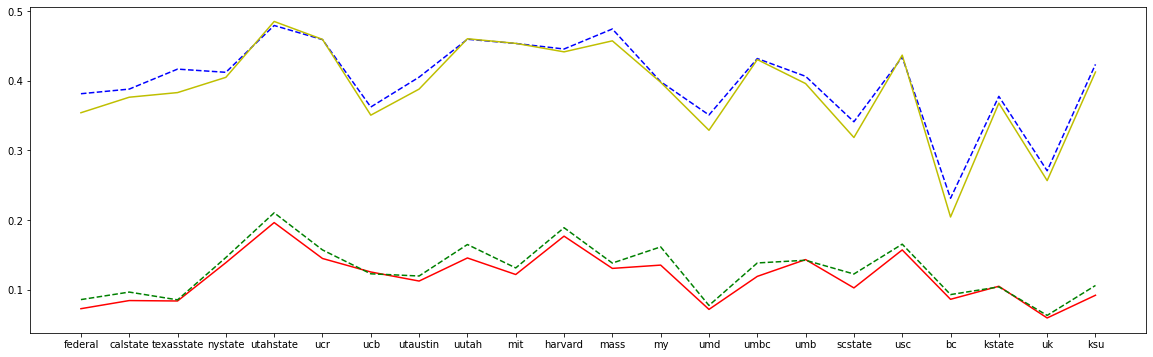

In [15]:
plt.figure(figsize=(20, 6))
plt.plot(df['name'], df['wptp'], 'r-', df['wpts'], 'b--', df['ftp'], 'g--', df['fts'], 'y-')
plt.show()

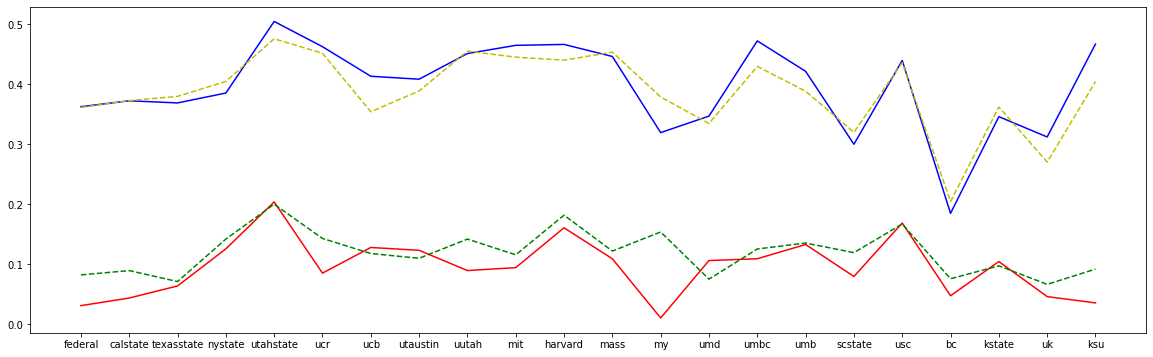

In [16]:
plt.figure(figsize=(20, 6))
plt.plot(df['name'], df['swp'], 'r-', df['sws'], 'b-', df['lwp'], 'g--', df['lws'], 'y--')
plt.show()

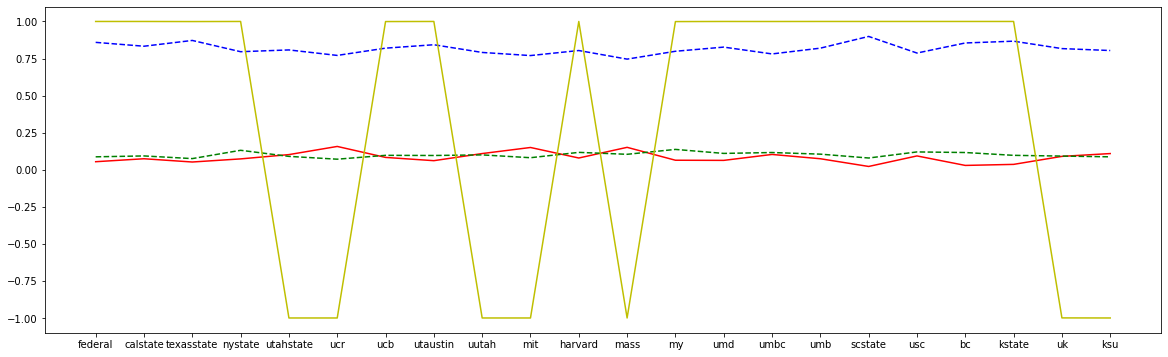

In [17]:
plt.figure(figsize=(20, 6))
plt.plot(df['name'], df['vader_neg'], 'r-', df['vader_neu'], 'b--', df['vader_pos'], 'g--', df['vader_compound'], 'y-')
plt.show()

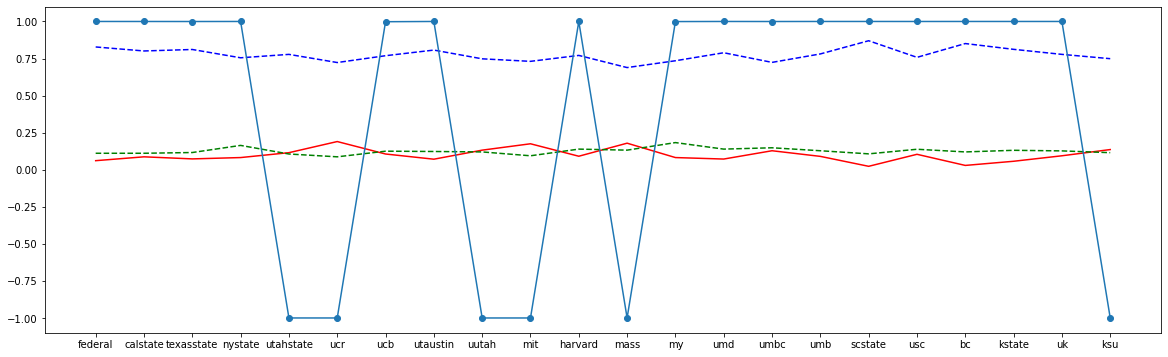

In [18]:
plt.figure(figsize=(20, 6))
plt.plot(df['name'], df['filtered_vader_neg'], 'r-', df['filtered_vader_neu'], 'b--', df['filtered_vader_pos'], 'g--', df['filtered_vader_compound'], 'o-')
plt.show()

## Seaborn Plotting

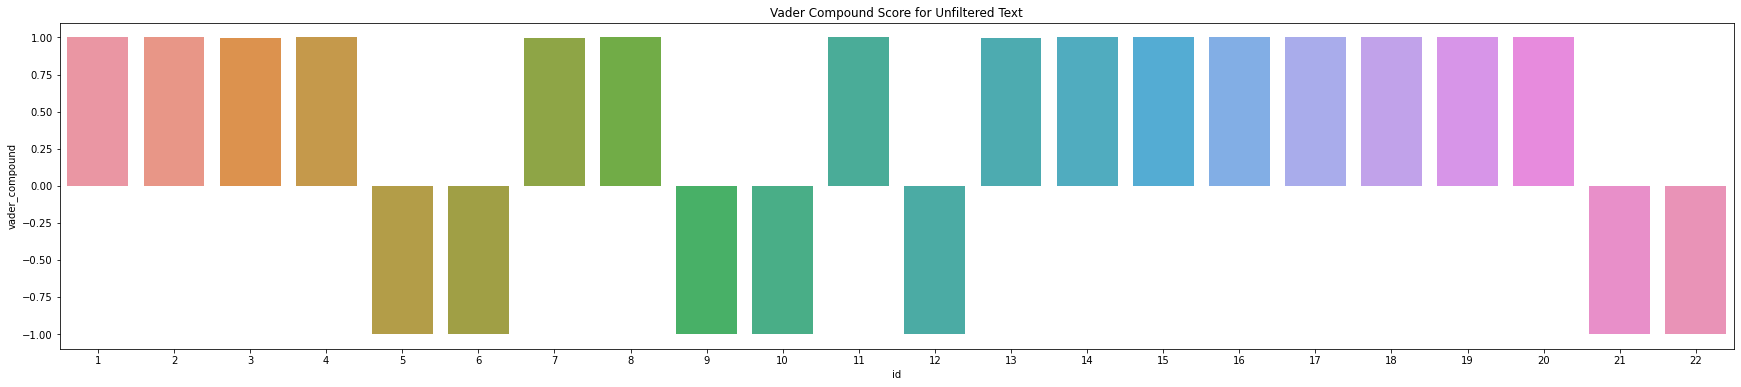

In [19]:
plt.figure(figsize=(30, 6))
ax = sns.barplot(data=df, x='id', y='vader_compound')
ax.set_title('Vader Compound Score for Unfiltered Text')
plt.show()

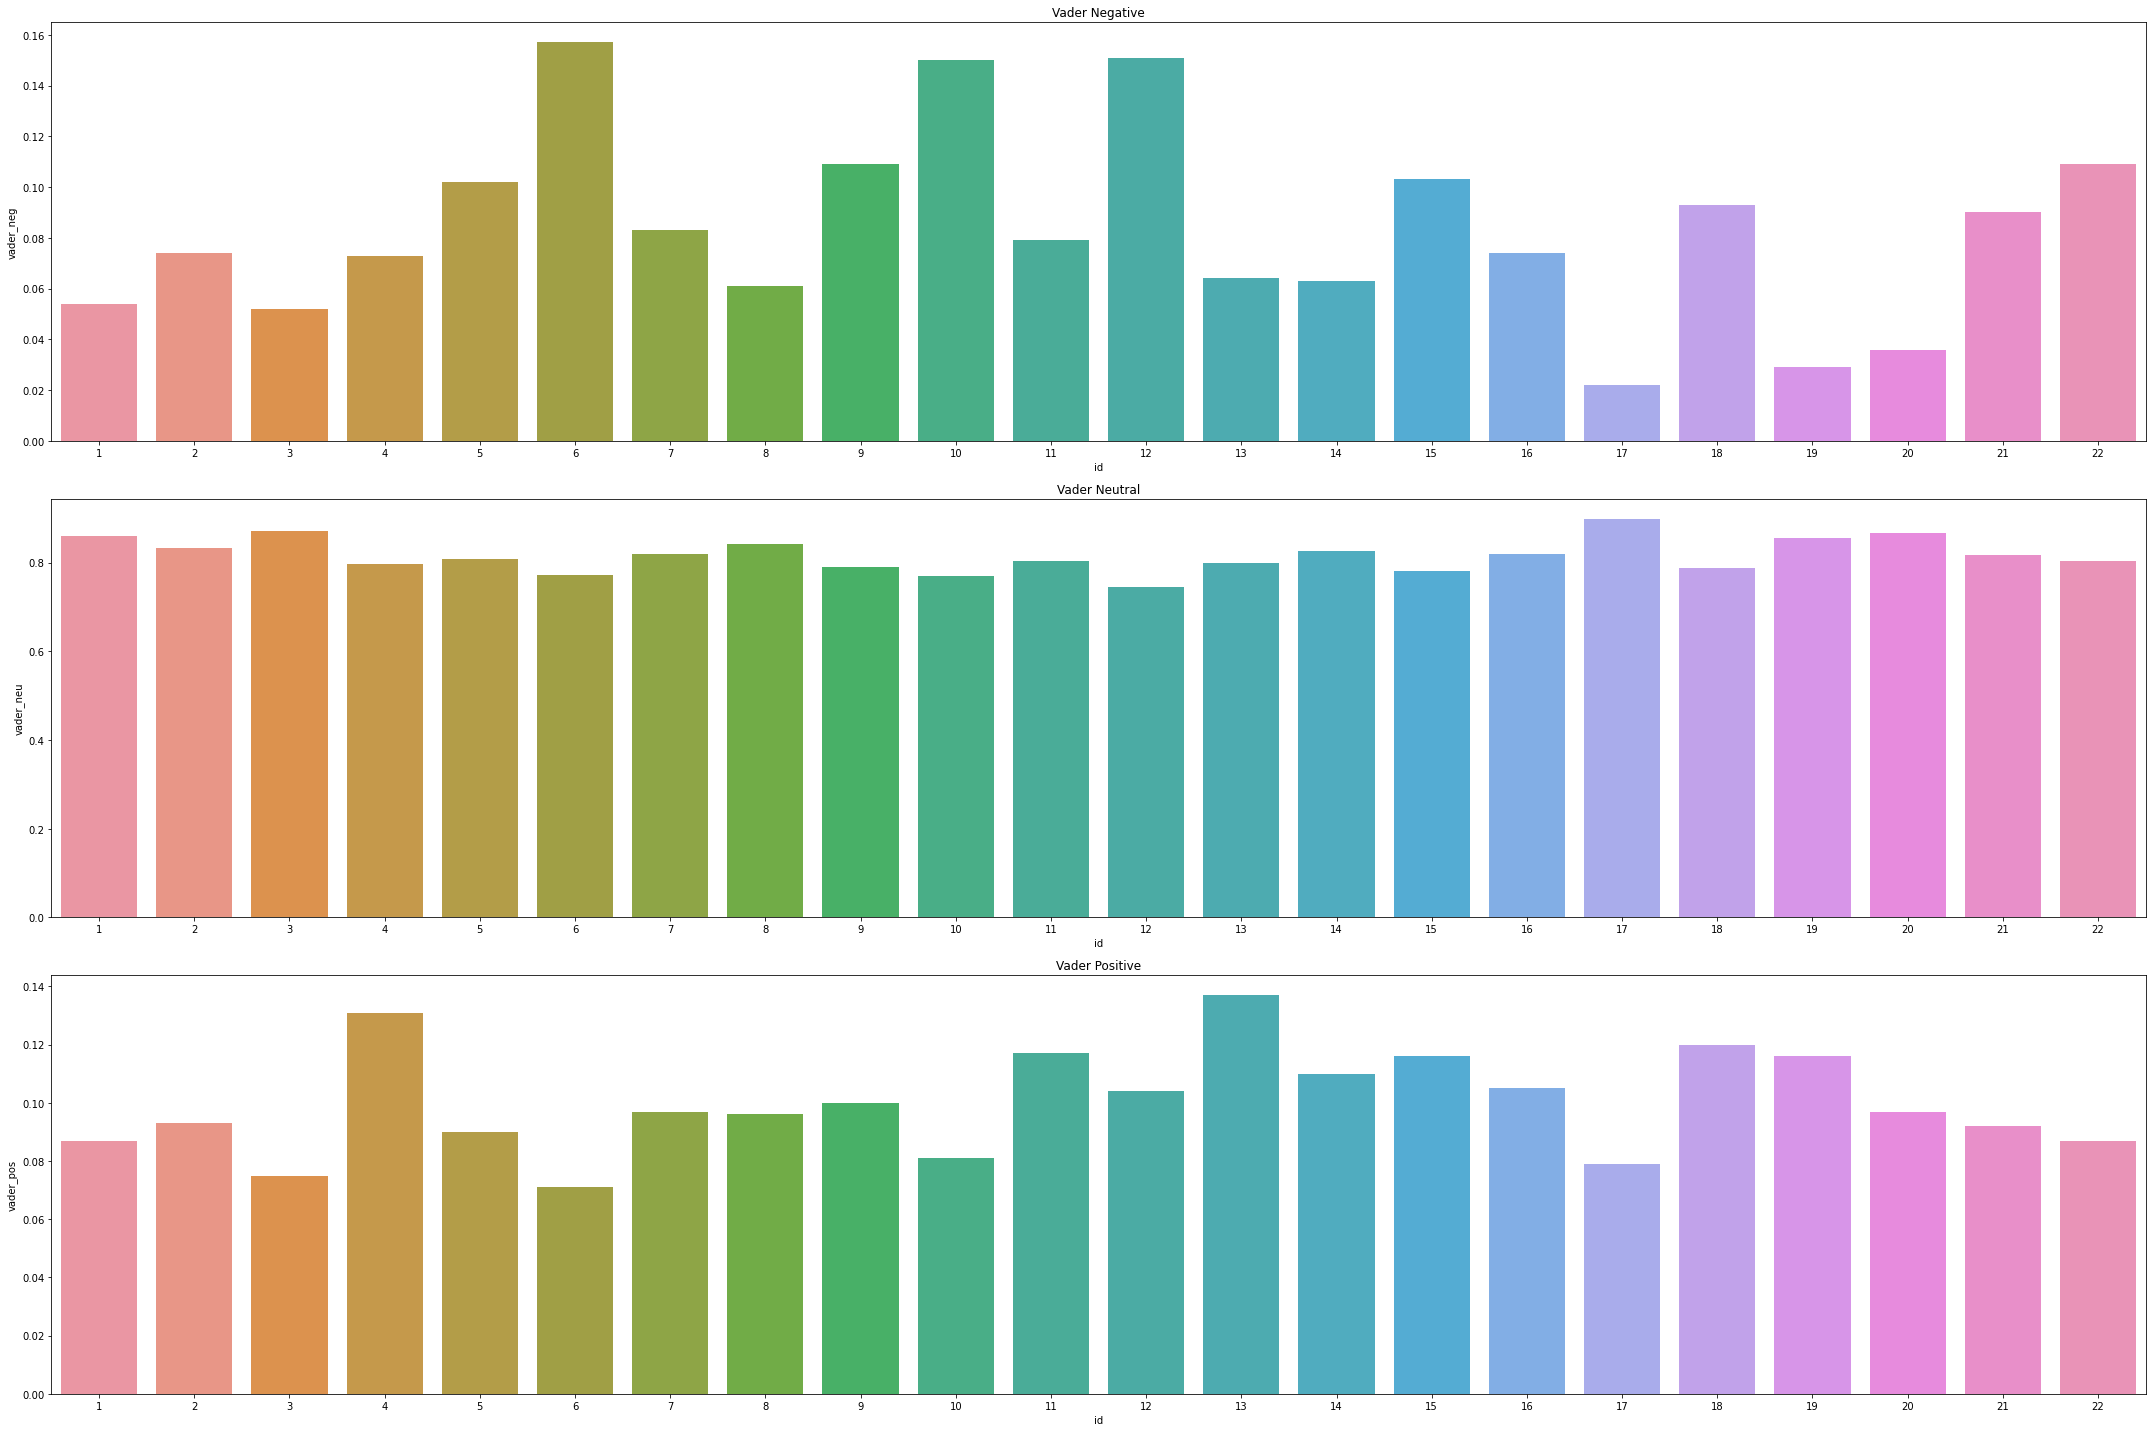

In [20]:
fig, axs = plt.subplots(3, 1, figsize=(30, 20))
sns.barplot(data=df, x='id', y='vader_neg', ax=axs[0])
sns.barplot(data=df, x='id', y='vader_neu', ax=axs[1])
sns.barplot(data=df, x='id', y='vader_pos', ax=axs[2])
axs[0].set_title('Vader Negative')
axs[1].set_title('Vader Neutral')
axs[2].set_title('Vader Positive')
plt.tight_layout()
plt.show()

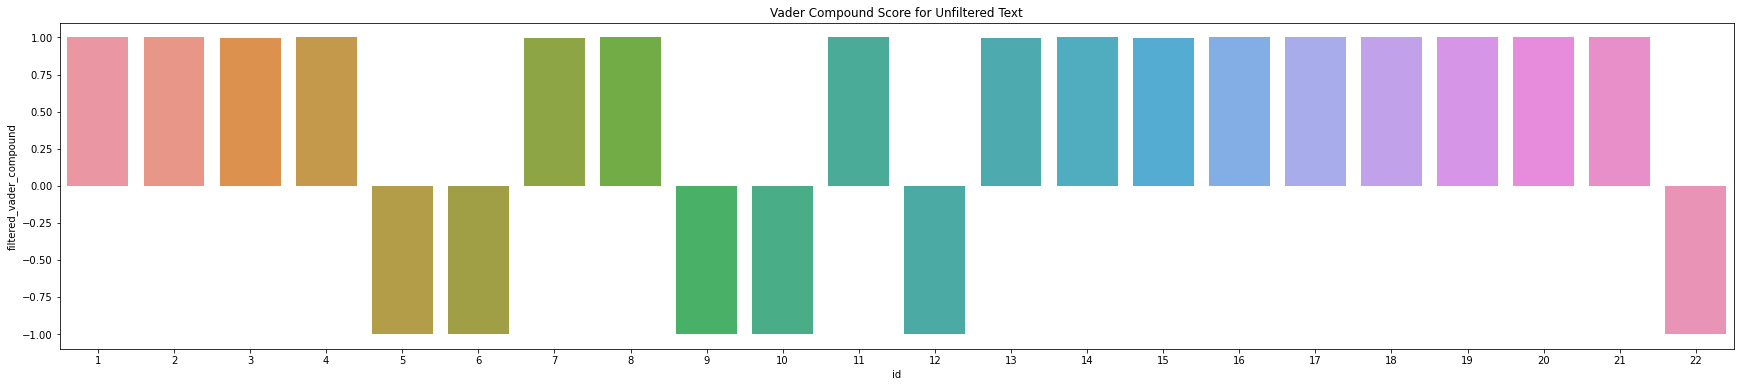

In [21]:
plt.figure(figsize=(30, 6))
ax = sns.barplot(data=df, x='id', y='filtered_vader_compound')
ax.set_title('Vader Compound Score for Unfiltered Text')
plt.show()

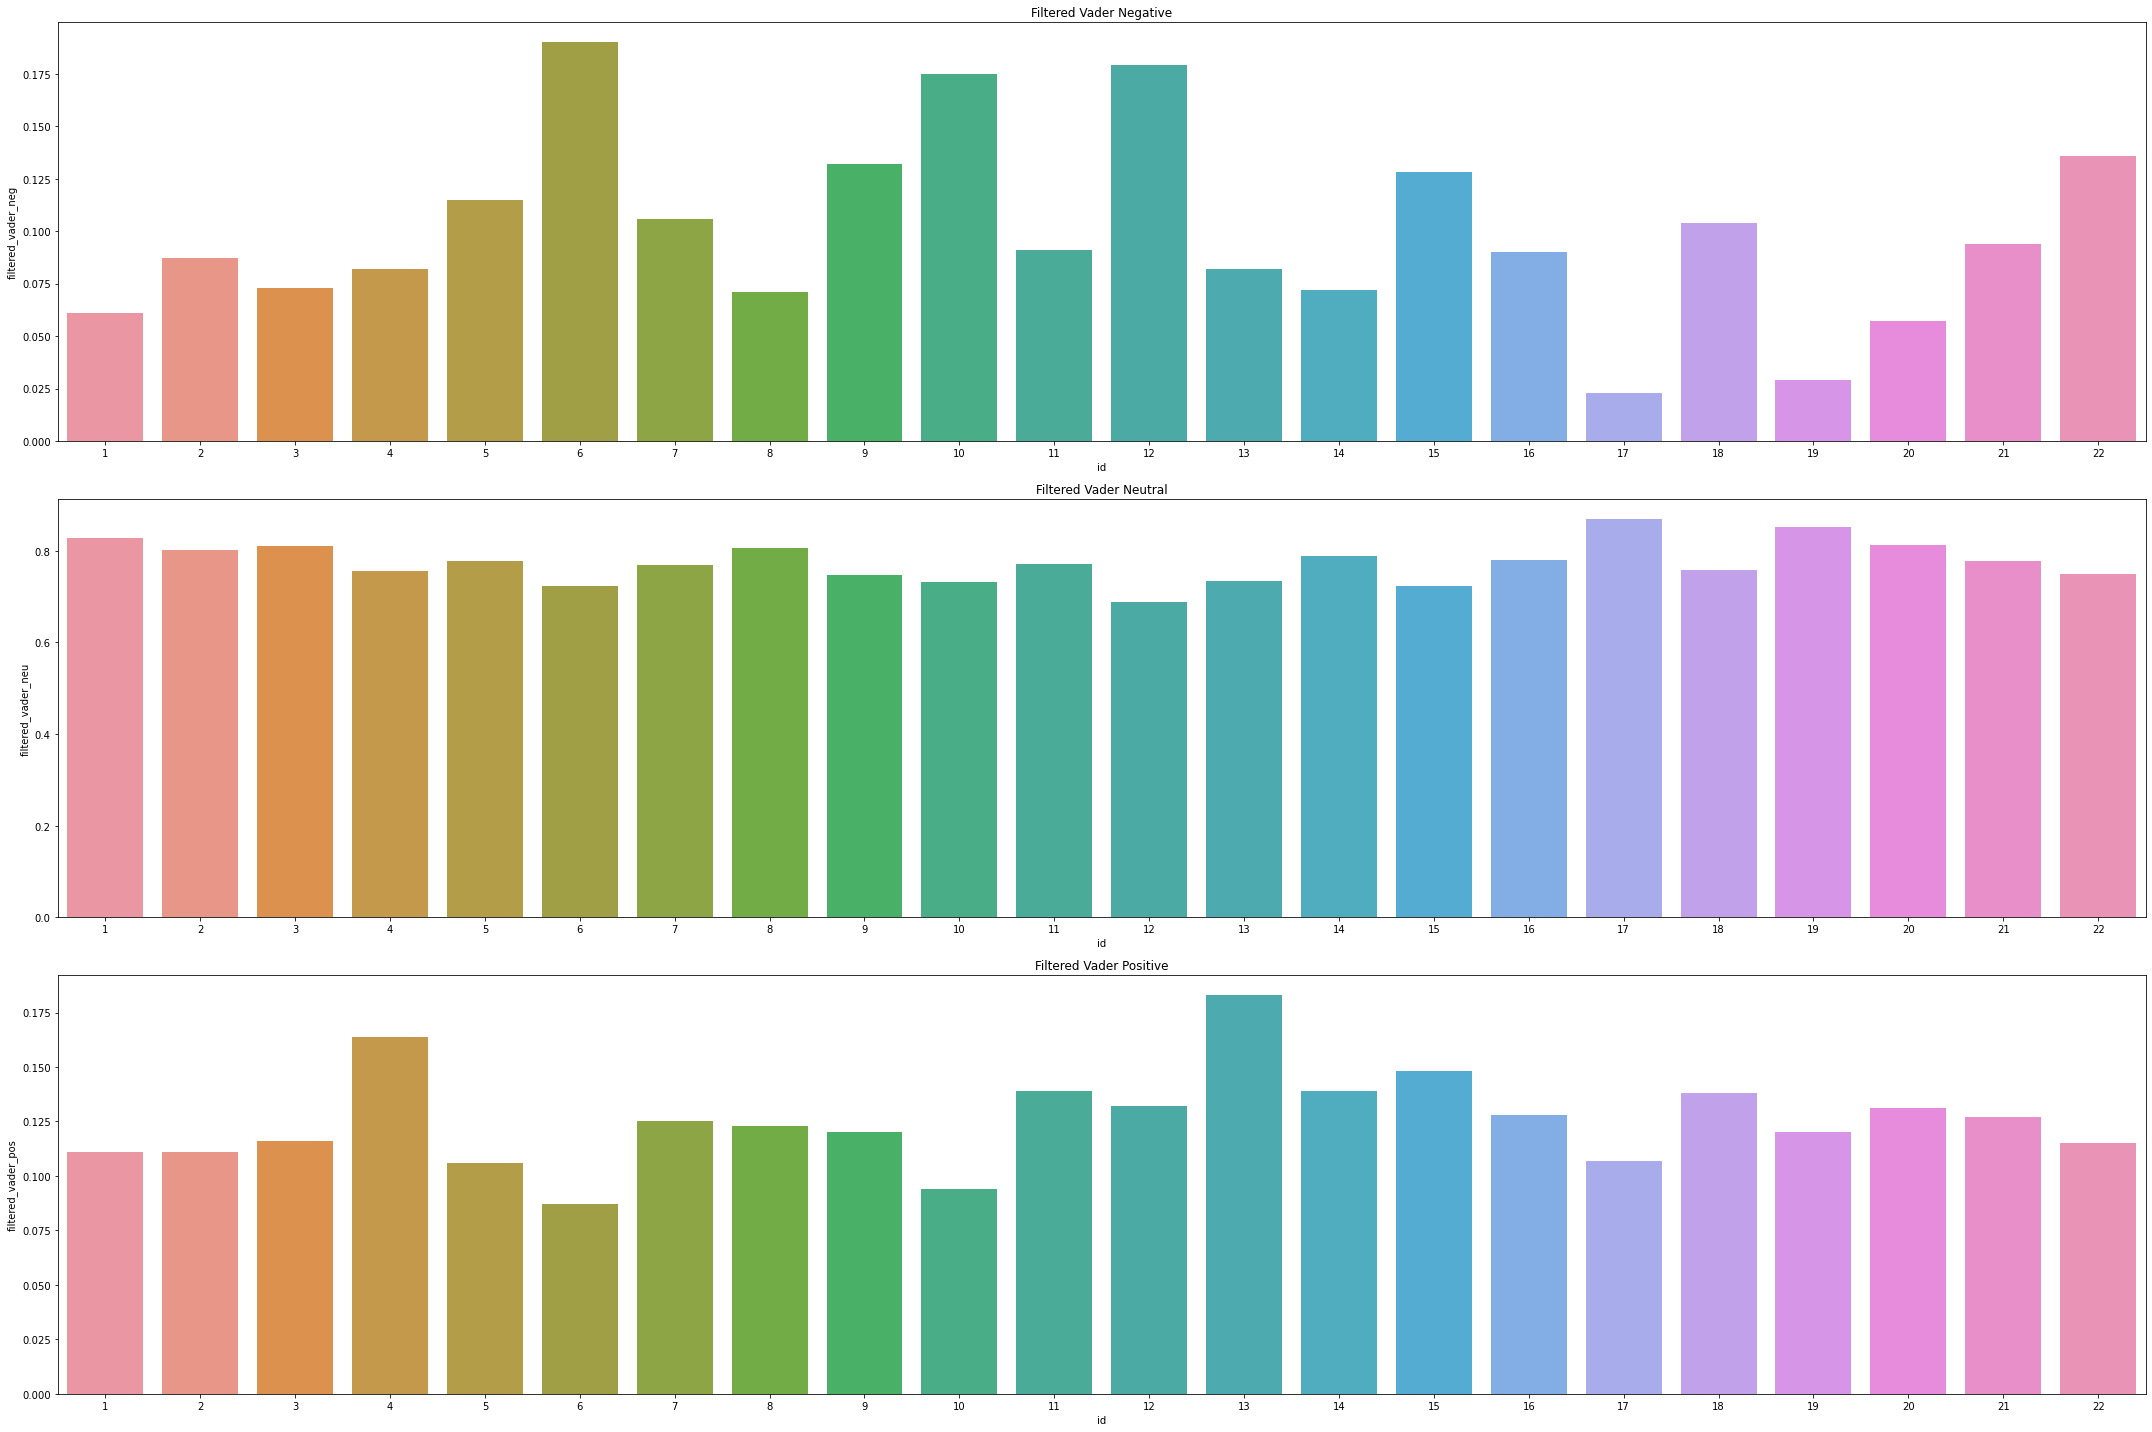

In [22]:
fig, axs = plt.subplots(3, 1, figsize=(30, 20))
sns.barplot(data=df, x='id', y='filtered_vader_neg', ax=axs[0])
sns.barplot(data=df, x='id', y='filtered_vader_neu', ax=axs[1])
sns.barplot(data=df, x='id', y='filtered_vader_pos', ax=axs[2])
axs[0].set_title('Filtered Vader Negative')
axs[1].set_title('Filtered Vader Neutral')
axs[2].set_title('Filtered Vader Positive')
plt.tight_layout()
plt.show()

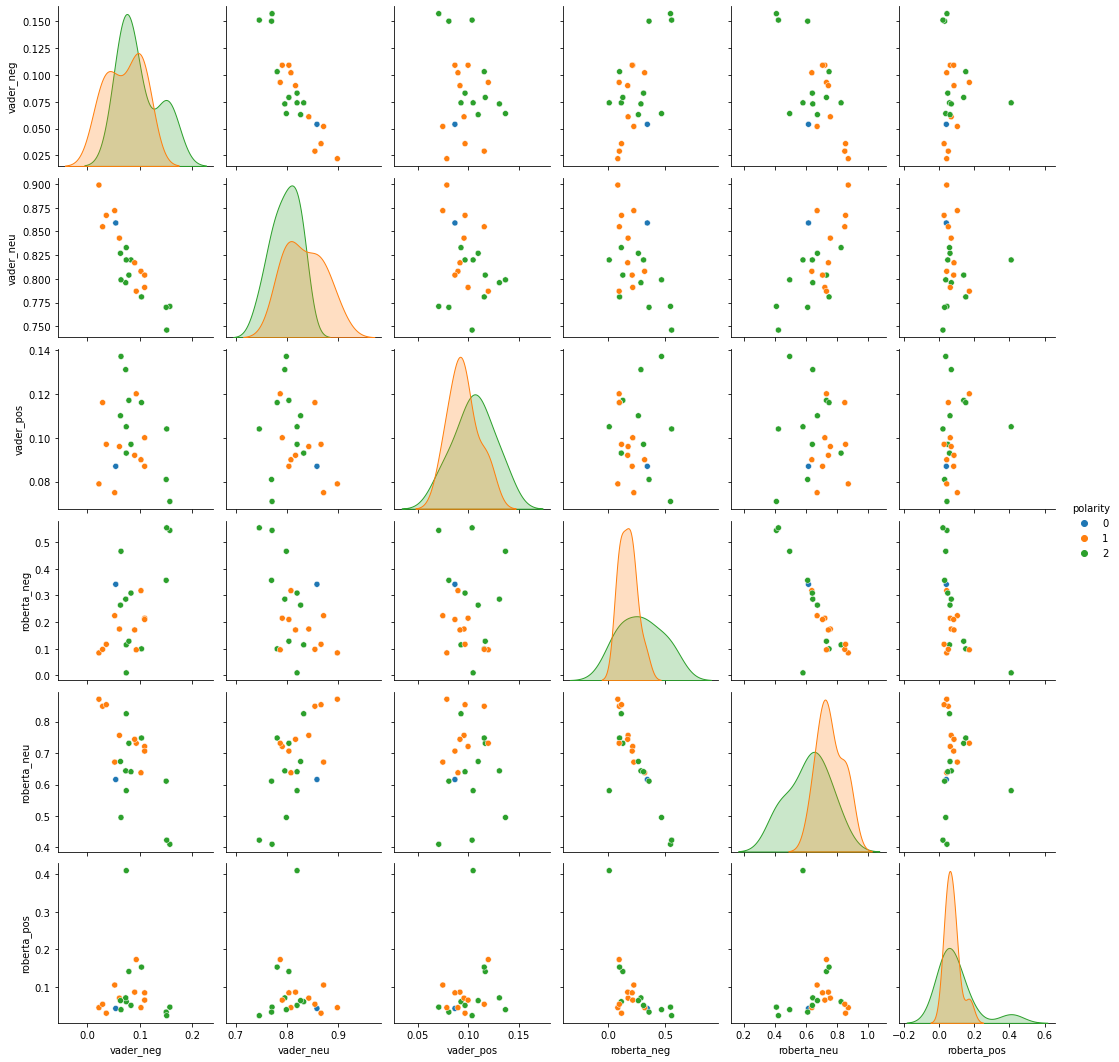

In [23]:
sns.pairplot(data=df,
             vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='polarity',
             palette='tab10')
plt.show()

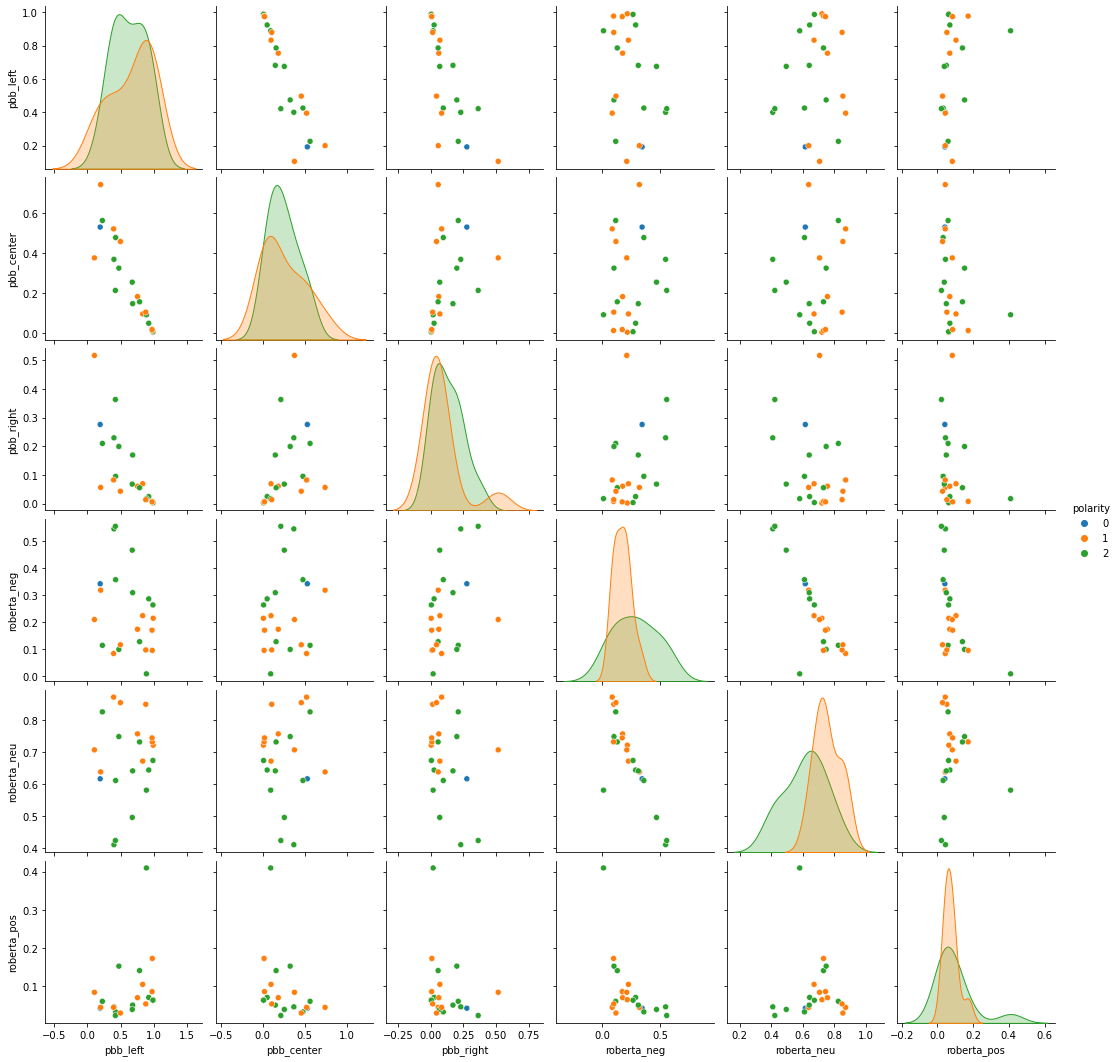

In [24]:
sns.pairplot(data=df,
             vars=['pbb_left', 'pbb_center', 'pbb_right', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='polarity',
             palette='tab10')
plt.show()

## Analysis Part

In [88]:
from sklearn import preprocessing, metrics, linear_model, model_selection, svm

In [89]:
adf = df[['wptp', 'wpts',
        'ftp', 'fts', 'swp', 'sws', 'lwp', 'lws', 'vader_neg', 'vader_neu',
        'vader_pos', 'vader_compound', 'filtered_vader_neg',
        'filtered_vader_neu', 'filtered_vader_pos', 'filtered_vader_compound',
        'roberta_neg', 'roberta_neu', 'roberta_pos', 'pbb_left', 'pbb_center',
        'pbb_right', 'polarity']]
adf.shape

(22, 23)

In [90]:
X = adf[['wptp', 'wpts',
        'ftp', 'fts', 'swp', 'sws', 'lwp', 'lws', 'vader_neg', 'vader_neu',
        'vader_pos', 'vader_compound', 'filtered_vader_neg',
        'filtered_vader_neu', 'filtered_vader_pos', 'filtered_vader_compound',
        'roberta_neg', 'roberta_neu', 'roberta_pos', 'pbb_left', 'pbb_center',
        'pbb_right']]
Y = adf[['polarity']]
X.shape, Y.shape

((22, 22), (22, 1))

## Correlation

<AxesSubplot:>

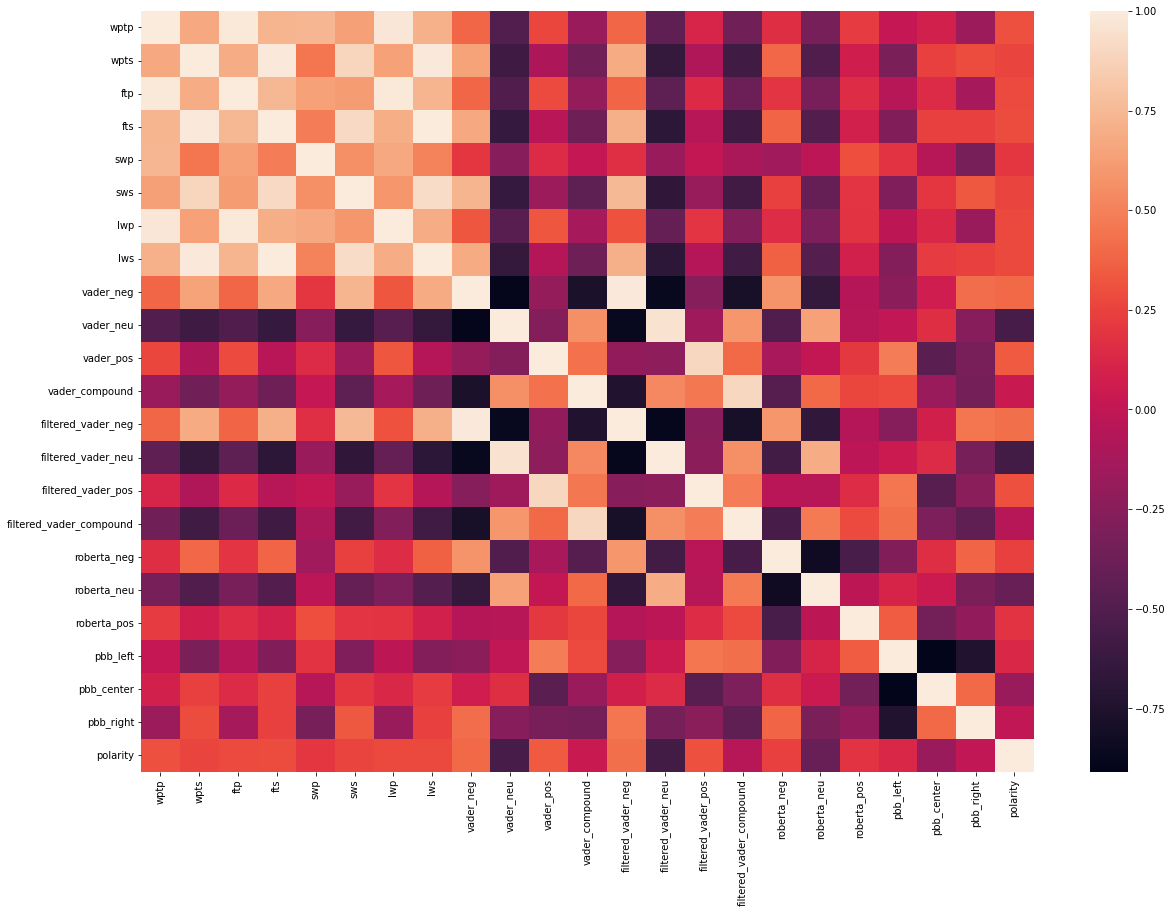

In [91]:
corr = adf.corr()
plt.figure(figsize=(20, 14))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [92]:
adf.corr()['polarity'].sort_values(ascending=False)

polarity                   1.000000
filtered_vader_neg         0.418402
vader_neg                  0.400085
vader_pos                  0.338004
filtered_vader_pos         0.306032
wptp                       0.305521
fts                        0.290535
ftp                        0.281647
lwp                        0.274373
lws                        0.274275
sws                        0.261387
wpts                       0.257964
roberta_neg                0.232162
swp                        0.197525
roberta_pos                0.183021
pbb_left                   0.128115
vader_compound             0.030416
pbb_right                 -0.005225
filtered_vader_compound   -0.047945
pbb_center                -0.172314
roberta_neu               -0.395486
vader_neu                 -0.549882
filtered_vader_neu        -0.570067
Name: polarity, dtype: float64

In [102]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=101) 
model = linear_model.LinearRegression()
model.fit(X_train, Y_train) 
predictions = model.predict(X_test) 
print('mean_squared_error : ', metrics.mean_squared_error(Y_test, predictions)) 
print('mean_absolute_error : ', metrics.mean_absolute_error(Y_test, predictions)) 

mean_squared_error :  7.592429845308742
mean_absolute_error :  2.3958622511099854


In [103]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=101) 
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(Y_test, y_pred))
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.4444444444444444
Precision: 0.0
Recall: 0.0


C:\Users\EndUser\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EndUser\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.44      1.00      0.62         4

    accuracy                           0.44         9
   macro avg       0.22      0.50      0.31         9
weighted avg       0.20      0.44      0.27         9



C:\Users\EndUser\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EndUser\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EndUser\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


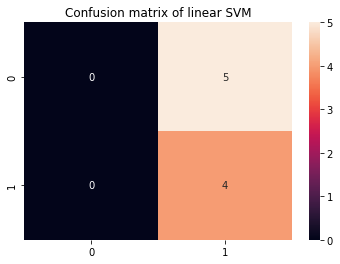

In [104]:
cm = metrics.confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers
print(metrics.classification_report(Y_test,y_pred))